Upload the csv file here (MP2_Data.csv)

In [1]:
from google.colab import files

uploaded = files.upload()


Saving MP2_Data.csv to MP2_Data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Provide the file name that you uploaded
file_name = 'MP2_Data.csv'

# Read the CSV file
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
df.head()


,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


Check the types of the feature, and see if there is any need of tweaking

In [3]:
df.dtypes

ID              object
Week2_Quiz1    float64
Week3_MP1      float64
Week3_PR1      float64
Week5_MP2      float64
Week5_PR2      float64
Week7_MP3      float64
Week7_PR3      float64
Week4_Quiz2    float64
Week6_Quiz3    float64
Week8_Total    float64
Week1_Stat0      int64
Week1_Stat1      int64
Week1_Stat2      int64
Week1_Stat3      int64
Week2_Stat0      int64
Week2_Stat1      int64
Week2_Stat2      int64
Week2_Stat3      int64
Week3_Stat0      int64
Week3_Stat1      int64
Week3_Stat2      int64
Week3_Stat3      int64
Week4_Stat0      int64
Week4_Stat1      int64
Week4_Stat2      int64
Week4_Stat3      int64
Week5_Stat0      int64
Week5_Stat1      int64
Week5_Stat2      int64
Week5_Stat3      int64
Week6_Stat0      int64
Week6_Stat1      int64
Week6_Stat2      int64
Week6_Stat3      int64
Week7_Stat0      int64
Week7_Stat1      int64
Week7_Stat2      int64
Week7_Stat3      int64
Week8_Stat0      int64
Week8_Stat1      int64
Week8_Stat2      int64
Week8_Stat3      int64
Week9_Stat0

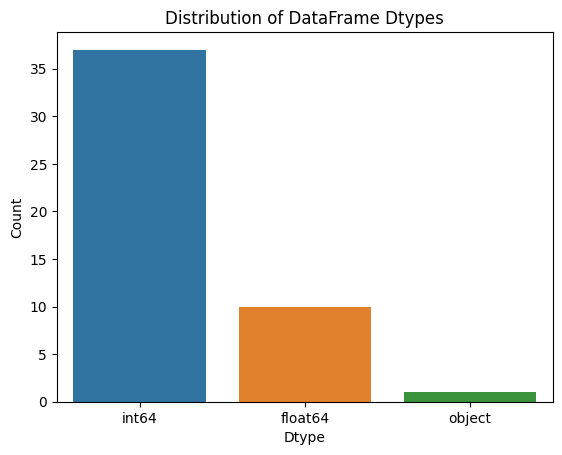

In [4]:
# Get the dtypes of the DataFrame
df_dtypes = df.dtypes.value_counts()

# Plot a bar chart of the dtype counts
sns.barplot(x=df_dtypes.index, y=df_dtypes.values)
plt.title("Distribution of DataFrame Dtypes")
plt.xlabel("Dtype")
plt.ylabel("Count")
plt.show()

In [5]:
# Check for missing values in the DataFrame
missing_values = df.isnull()

# Display the columns with missing values and the count of missing values in each column
missing_columns = missing_values.sum()
print("Columns with missing values:")
print(missing_columns[missing_columns > 0])

# To get the total count of missing values in the DataFrame, you can sum the result
total_missing = missing_values.sum().sum()
print(f"Total missing values in the DataFrame: {total_missing}")


Columns with missing values:
Series([], dtype: int64)
Total missing values in the DataFrame: 0


In [6]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Print the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [ID, Week2_Quiz1, Week3_MP1, Week3_PR1, Week5_MP2, Week5_PR2, Week7_MP3, Week7_PR3, Week4_Quiz2, Week6_Quiz3, Week8_Total, Week1_Stat0, Week1_Stat1, Week1_Stat2, Week1_Stat3, Week2_Stat0, Week2_Stat1, Week2_Stat2, Week2_Stat3, Week3_Stat0, Week3_Stat1, Week3_Stat2, Week3_Stat3, Week4_Stat0, Week4_Stat1, Week4_Stat2, Week4_Stat3, Week5_Stat0, Week5_Stat1, Week5_Stat2, Week5_Stat3, Week6_Stat0, Week6_Stat1, Week6_Stat2, Week6_Stat3, Week7_Stat0, Week7_Stat1, Week7_Stat2, Week7_Stat3, Week8_Stat0, Week8_Stat1, Week8_Stat2, Week8_Stat3, Week9_Stat0, Week9_Stat1, Week9_Stat2, Week9_Stat3, Grade]
Index: []

[0 rows x 48 columns]


# Show all the correlations

You can find features that are highly correlated with the target variable. For instance, if you have a numerical target, you can calculate the correlation between features and the target. Features with high correlation values (either positive or negative) are considered important.

In [7]:
correlation_matrix = df.corr()
important_features = correlation_matrix['Grade'].sort_values(ascending=False)
important_features

<ipython-input-7-f0710e66a02d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Grade          1.000000
Week8_Total    0.972348
Week7_MP3      0.968130
Week5_MP2      0.953488
Week5_PR2      0.907837
Week3_MP1      0.901788
Week3_PR1      0.887352
Week7_PR3      0.865616
Week6_Quiz3    0.849920
Week4_Quiz2    0.810920
Week6_Stat1    0.771988
Week2_Quiz1    0.689783
Week4_Stat1    0.662946
Week3_Stat0    0.643789
Week6_Stat0    0.635807
Week4_Stat0    0.625359
Week3_Stat1    0.596824
Week5_Stat0    0.590146
Week8_Stat1    0.584425
Week9_Stat0    0.545532
Week9_Stat1    0.496753
Week5_Stat1    0.484030
Week8_Stat0    0.450807
Week7_Stat3    0.439733
Week7_Stat1    0.424807
Week2_Stat1    0.406120
Week7_Stat0    0.377195
Week2_Stat0    0.293296
Week2_Stat2    0.292262
Week6_Stat2    0.288761
Week4_Stat3    0.278034
Week6_Stat3    0.270239
Week5_Stat3    0.264079
Week1_Stat0    0.256311
Week8_Stat3    0.234907
Week3_Stat3    0.227106
Week2_Stat3    0.202950
Week4_Stat2    0.171987
Week9_Stat2    0.147822
Week9_Stat3    0.094227
Week7_Stat2    0.087466
Week5_Stat2    0

In [8]:
# Assuming df is your DataFrame
# Change 'Grade' to the actual name of your target column
target_variable = 'Grade'

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter features with a correlation >= 0.5 or <= -0.5 with the target variable
important_features = correlation_matrix[(correlation_matrix[target_variable] >= 0.4) | (correlation_matrix[target_variable] <= -0.4)][target_variable]

# Sort the features by their correlation scores
important_features = important_features.sort_values(ascending=False)

# The important features are now stored in the 'important_features' Series
print(important_features)


Grade          1.000000
Week8_Total    0.972348
Week7_MP3      0.968130
Week5_MP2      0.953488
Week5_PR2      0.907837
Week3_MP1      0.901788
Week3_PR1      0.887352
Week7_PR3      0.865616
Week6_Quiz3    0.849920
Week4_Quiz2    0.810920
Week6_Stat1    0.771988
Week2_Quiz1    0.689783
Week4_Stat1    0.662946
Week3_Stat0    0.643789
Week6_Stat0    0.635807
Week4_Stat0    0.625359
Week3_Stat1    0.596824
Week5_Stat0    0.590146
Week8_Stat1    0.584425
Week9_Stat0    0.545532
Week9_Stat1    0.496753
Week5_Stat1    0.484030
Week8_Stat0    0.450807
Week7_Stat3    0.439733
Week7_Stat1    0.424807
Week2_Stat1    0.406120
Name: Grade, dtype: float64


<ipython-input-8-ce6dfc69e84f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


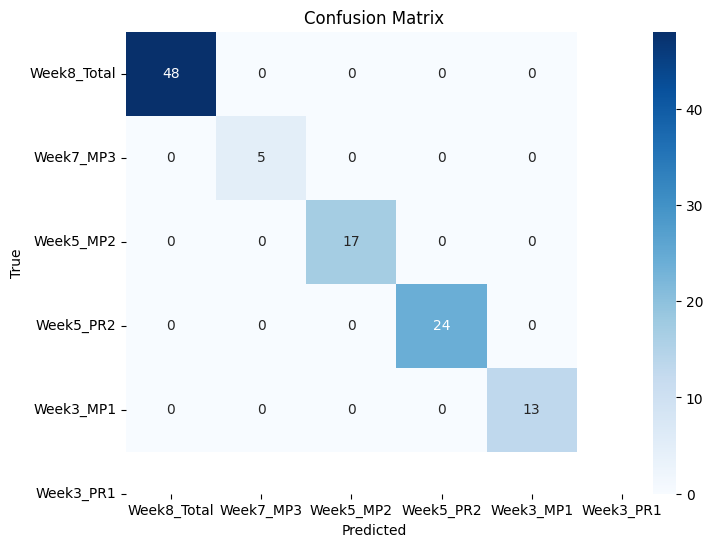

In [9]:
# Get the top 6 important features
top_6_features = important_features.index[1:7]

# Assuming 'predicted' is your model's predicted grades and 'true' is the true grades
predicted = df['Grade']
true = df['Grade']

# Create the confusion matrix
confusion = confusion_matrix(true, predicted)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=top_6_features, yticklabels=top_6_features)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Create a new DataFrame with the selected features
df_new = df[important_features.index]
df_new.head()

,Grade,Week8_Total,Week7_MP3,Week5_MP2,Week5_PR2,Week3_MP1,Week3_PR1,Week7_PR3,Week6_Quiz3,Week4_Quiz2,...,Week3_Stat1,Week5_Stat0,Week8_Stat1,Week9_Stat0,Week9_Stat1,Week5_Stat1,Week8_Stat0,Week7_Stat3,Week7_Stat1,Week2_Stat1
0,4,82.97,21.88,16.09,5.00,15.0,5.0,5.0,5.0,5.00,...,4,24,4,8,6,6,5,0,0,30
1,4,82.43,22.27,17.83,5.00,15.0,5.0,5.0,5.0,4.00,...,4,48,2,25,3,19,5,8,9,10
2,3,79.44,27.05,15.22,5.00,13.0,5.0,2.5,5.0,5.00,...,4,28,2,9,0,6,8,0,4,10
3,3,80.65,31.02,10.00,5.00,14.0,5.0,5.0,5.0,3.13,...,4,47,0,7,6,4,10,4,4,10
4,2,67.68,15.91,12.17,4.93,15.0,5.0,5.0,5.0,4.67,...,5,32,5,5,3,12,8,6,4,0


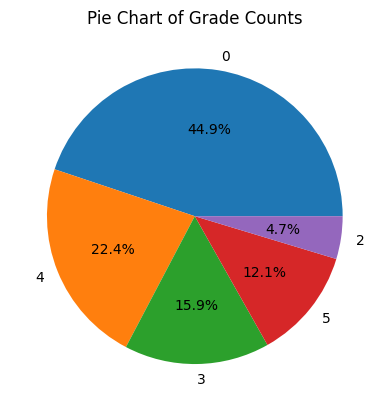

In [11]:
grade_counts = df_new['Grade'].value_counts()

plt.pie(grade_counts, labels=grade_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Grade Counts")
plt.show()


In [12]:
# Define your feature columns (excluding the target 'Grade' column)
X = df_new.drop(columns=['Grade'])

# Define your target column
y = df_new['Grade']

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Calculate and compare accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)

# Calculate and compare other metrics
rf_precision = precision_score(y_test, rf_preds, average='macro')
lr_precision = precision_score(y_test, lr_preds, average='macro')
rf_recall = recall_score(y_test, rf_preds, average='macro')
lr_recall = recall_score(y_test, lr_preds, average='macro')
rf_f1 = f1_score(y_test, rf_preds, average='macro')
lr_f1 = f1_score(y_test, lr_preds, average='macro')

# Display the results
print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

print("Random Forest Precision:", rf_precision)
print("Logistic Regression Precision:", lr_precision)

print("Random Forest Recall:", rf_recall)
print("Logistic Regression Recall:", lr_recall)

print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression F1 Score:", lr_f1)


Random Forest Accuracy: 0.9090909090909091
Logistic Regression Accuracy: 0.5
Random Forest Precision: 0.7
Logistic Regression Precision: 0.33999999999999997
Random Forest Recall: 0.7333333333333333
Logistic Regression Recall: 0.32666666666666666
Random Forest F1 Score: 0.6933333333333334
Logistic Regression F1 Score: 0.31492063492063493


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


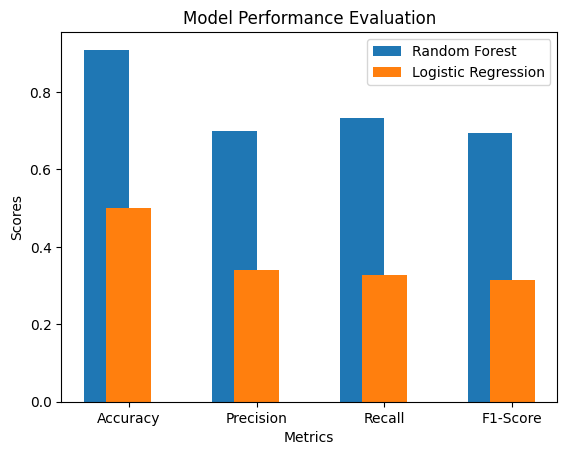

In [14]:
# Define the evaluation metrics and their values for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_f1]
lr_values = [lr_accuracy, lr_precision, lr_recall, lr_f1]

# Create a bar plot
x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, rf_values, width, label='Random Forest', align='center')
rects2 = ax.bar(x, lr_values, width, label='Logistic Regression', align='edge')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Evaluation')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(metrics)
ax.legend()

# Display the bar plot
plt.show()


In [15]:
# computing accuracy score for the model to evaluate the model performance
print(classification_report(y_test, rf_preds))
print("Accuracy: ", accuracy_score(y_test, rf_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           2       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         6
           5       1.00      0.67      0.80         3

    accuracy                           0.91        22
   macro avg       0.70      0.73      0.69        22
weighted avg       0.91      0.91      0.90        22

Accuracy:  0.9090909090909091


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Assuming you have a feature matrix X and a target variable y

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)

# Get feature importances
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
dt_feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)

# Combine feature importances into one DataFrame
feature_importance_df = pd.DataFrame({'Random Forest': rf_feature_importances, 'Decision Tree': dt_feature_importances})

# Find the top 3 features for each model
top3_rf_features = feature_importance_df['Random Forest'].nlargest(3)
top3_dt_features = feature_importance_df['Decision Tree'].nlargest(3)

# Compare the top features in a table
top_features_table = pd.DataFrame({'Random Forest': top3_rf_features.index, 'Decision Tree': top3_dt_features.index})

# Display the table
print(top_features_table)


  Random Forest Decision Tree
0   Week8_Total   Week8_Total
1     Week7_MP3     Week7_MP3
2     Week5_MP2     Week5_MP2
